# Problem Statement

### Developing a machine learning model to predict customer churn based on historical customer data. 
#### Providing a full fleged working prototype from data preprocessing to model deployment


# Summary of the Process

## Data Preprocessing:
##
#### You prepared the dataset for churn prediction. Applied preprocessing steps like StandardScaler for numerical features and OneHotEncoding for categorical features to transform the data into a suitable format for modeling.

##
## Visualization:
##
#### Employed different visualization techniques like heatmaps, bar plots, and count plots to gain insights into the data. Heatmaps possibly showed correlations between features and helped identify important relationships.Bar plots and count plots might have displayed distributions and categorical feature effects on churn.
##

## Model Selection with PyCaret:
##
#### Leveraged PyCaret, a Python library for automating machine learning workflows, to streamline the model selection process. Utilized PyCaret's functionality to compare various machine learning models in a single step. Explored different algorithms, enabling you to quickly evaluate their performance and choose the most promising ones.
##

## Best Model Selection:
##
### Analyzed the results provided by PyCaret to identify the best-performing model based on evaluation metrics like accuracy, recall, F1-score, etc.
### Selected the model that demonstrated the most desirable trade-off between these metrics for your specific use case.
##

## Model Evaluation:
##
#### Used a test dataset that was separate from the training data to assess the chosen model's performance. Calculated accuracy, recall, and F1-score to gauge how well the model performs in identifying churn cases.
##

## Model Persistence with Pickle:
##
#### Leveraged the pickle library to save the trained machine learning model in a serialized format. This serialized model could be easily loaded and used for predictions without retraining every time.
##
## Web App Development with Streamlit:
##
#### Utilized Streamlit, a Python library for creating interactive web applications, to develop a user-friendly interface. Integrated the saved model into the Streamlit app, allowing users to input their data and receive churn predictions.
##


## User Interaction and Prediction:
##
#### Through the Streamlit web app, users could input their data (such as customer features) to predict churn probability. The app processed the input through the saved model, returning predictions to the user. Overall, your project demonstrated a comprehensive end-to-end workflow for customer churn prediction: Data preprocessing, feature engineering, model comparison, model evaluation, and the development of an interactive web application using Streamlit for real-world usage.

In [49]:
#Requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from pycaret.classification import *
import pickle

In [2]:
df=pd.read_excel('customer_churn_large_dataset.xlsx')

In [3]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


## Data Insights

##### Data insights were extracted from the dataset to understand its characteristics. Visualizations like heatmaps, bar plots, and count plots revealed feature relationships and distributions. This exploration provided valuable information about the data's patterns and potential variables influencing the target, aiding subsequent modeling decisions.

In [4]:
df.head(5) #provides first 5 rows of the dataset

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
df.info() #provides the knowledge if it needs any data pre-processing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
df.describe() #describes various statistical info about the dataset

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
df['Gender'].value_counts() #Gender distribution

Female    50216
Male      49784
Name: Gender, dtype: int64

In [8]:
df['Location'].value_counts() #location distribution

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [9]:
df['Age'].min(),round(df['Age'].mean()),df['Age'].max() #Min, Average & Max value of Age column

(18, 44, 70)

In [10]:
#Similary that of Usage & Monthly Bill
df['Total_Usage_GB'].min(),round(df['Total_Usage_GB'].mean()) ,df['Total_Usage_GB'].max()

(50, 274, 500)

In [11]:
df['Monthly_Bill'].min(), round(df['Monthly_Bill'].mean()) ,df['Monthly_Bill'].max()

(30.0, 65, 100.0)

## Data Visualizations

#### Various visualizations, including heatmaps, bar plots, and count plots, were utilized to gain insights into the dataset. These visuals unveiled correlations, distributions, and categorical effects, providing a concise overview of the data's attributes and aiding in informed decision-making during analysis and model selection.

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Subscription_Length_Months'}>,
        <Axes: title={'center': 'Monthly_Bill'}>],
       [<Axes: title={'center': 'Total_Usage_GB'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

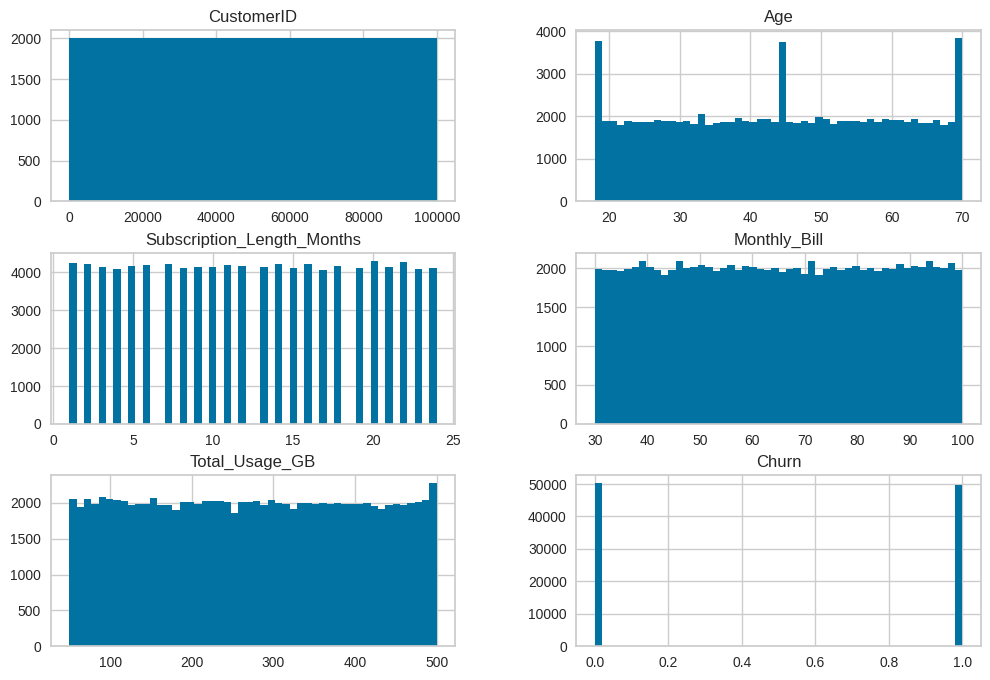

In [12]:
df.hist(bins=50,figsize=(12,8))

<Axes: xlabel='Gender', ylabel='Monthly_Bill'>

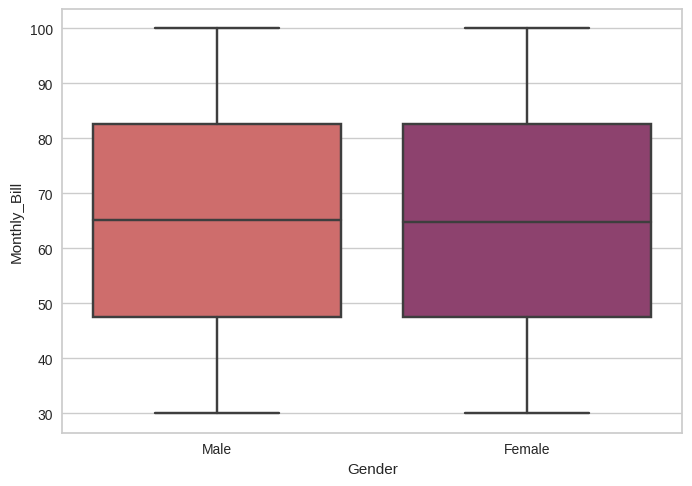

In [13]:
sns.boxplot(x=df["Gender"], y=df["Monthly_Bill"],palette="flare")

<Axes: xlabel='Gender', ylabel='Subscription_Length_Months'>

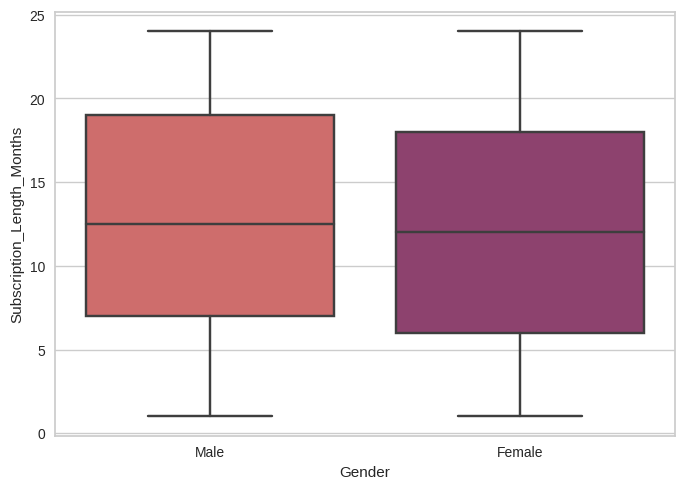

In [14]:
sns.boxplot(x=df["Gender"], y=df["Subscription_Length_Months"],palette="flare")

<Axes: xlabel='Gender', ylabel='Total_Usage_GB'>

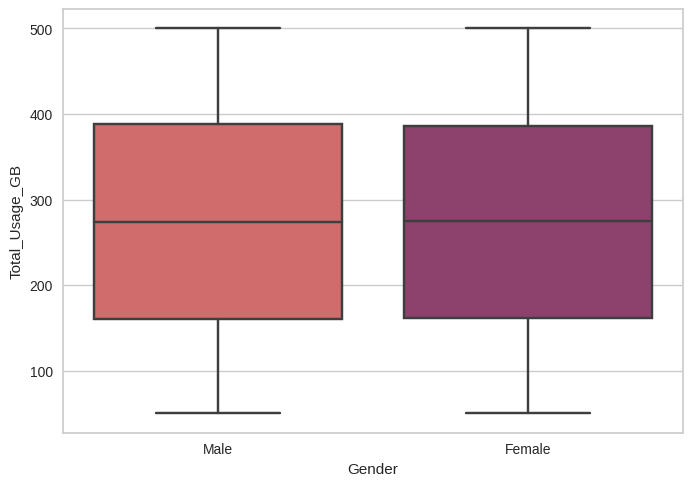

In [15]:
sns.boxplot(x=df["Gender"], y=df["Total_Usage_GB"],palette="flare")

<Axes: xlabel='Location', ylabel='Monthly_Bill'>

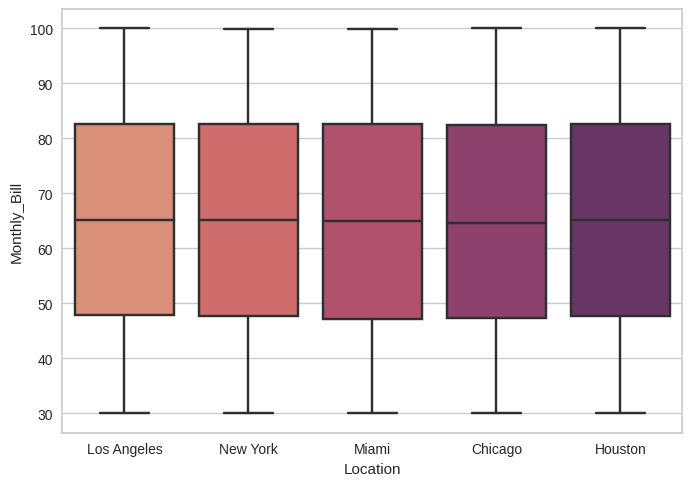

In [16]:
sns.boxplot(x=df["Location"], y=df["Monthly_Bill"],palette="flare")

<Axes: xlabel='Location', ylabel='Subscription_Length_Months'>

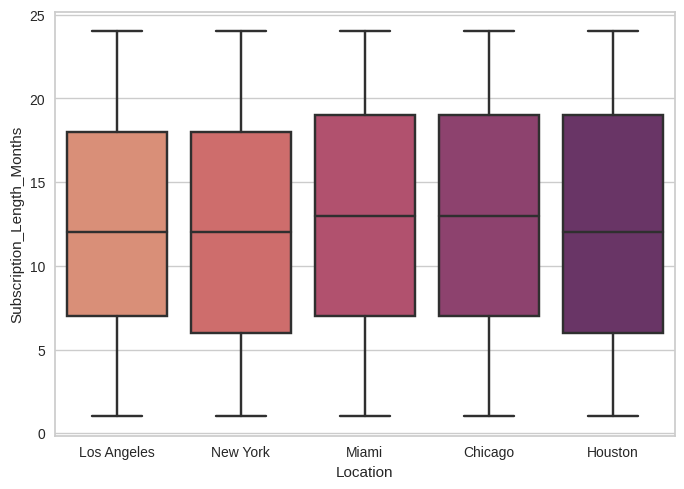

In [17]:
sns.boxplot(x=df["Location"], y=df["Subscription_Length_Months"],palette="flare")

<Axes: xlabel='Location', ylabel='Total_Usage_GB'>

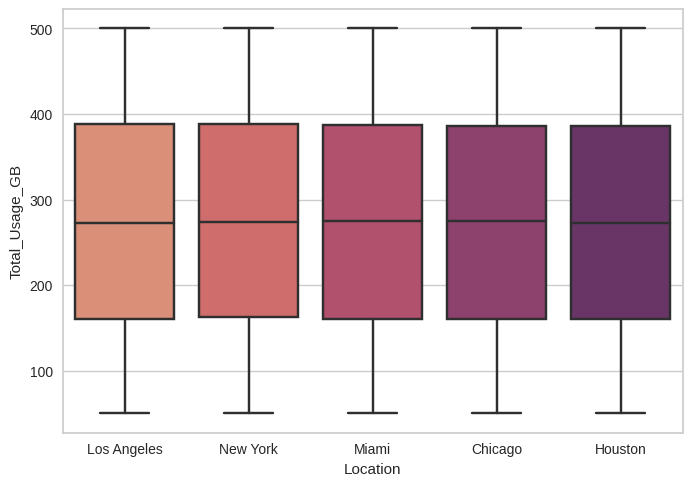

In [18]:
sns.boxplot(x=df["Location"], y=df["Total_Usage_GB"],palette="flare")

Text(0, 0.5, 'Churn')

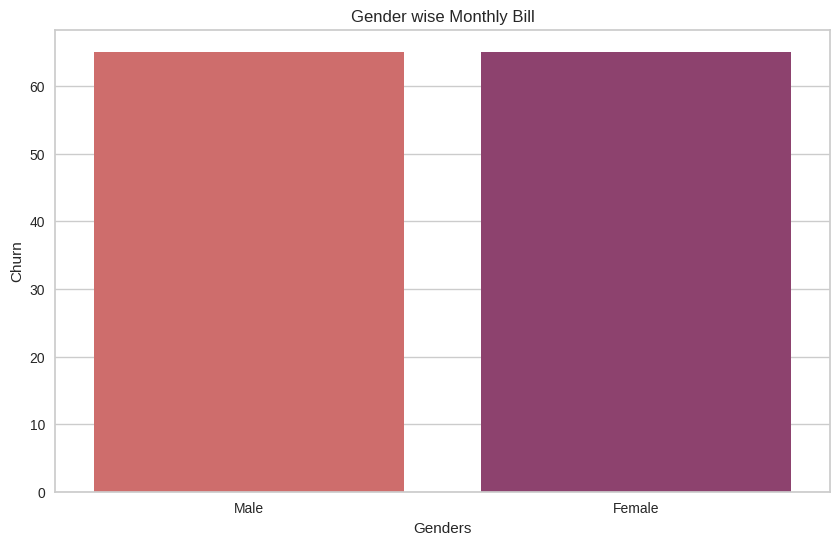

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Gender'], y=df['Monthly_Bill'], ci=None, palette="flare")
plt.title("Gender wise Monthly Bill")
plt.xlabel("Genders")
plt.ylabel("Churn")

Text(0, 0.5, 'Total_Usage(GB)')

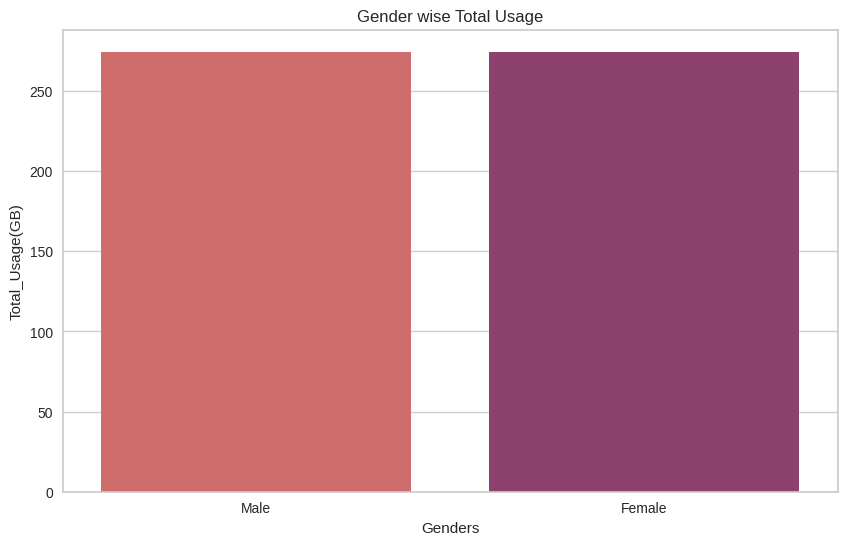

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Gender'], y=df['Total_Usage_GB'], ci=None, palette="flare")
plt.title("Gender wise Total Usage")
plt.xlabel("Genders")
plt.ylabel("Total_Usage(GB)")

Text(0, 0.5, 'Subscription-Months')

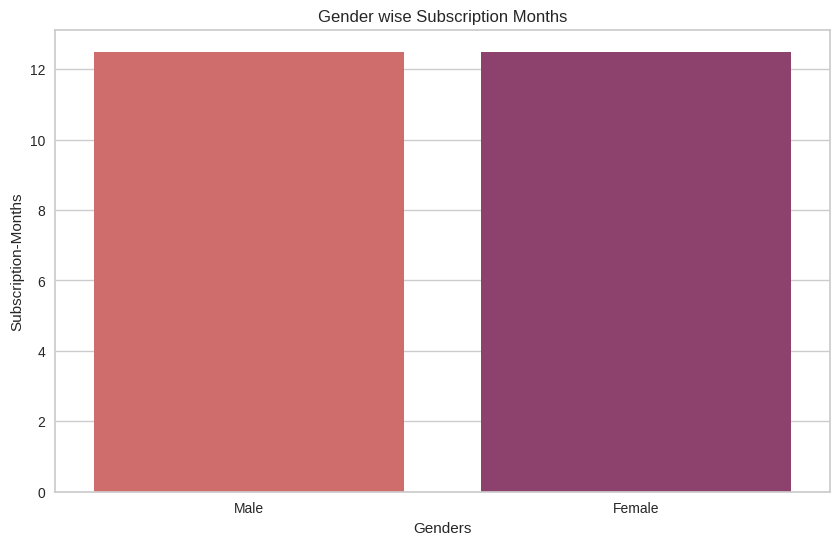

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Gender'], y=df['Subscription_Length_Months'], ci=None, palette="flare")
plt.title("Gender wise Subscription Months")
plt.xlabel("Genders")
plt.ylabel("Subscription-Months")

Text(0, 0.5, 'Subscription Months')

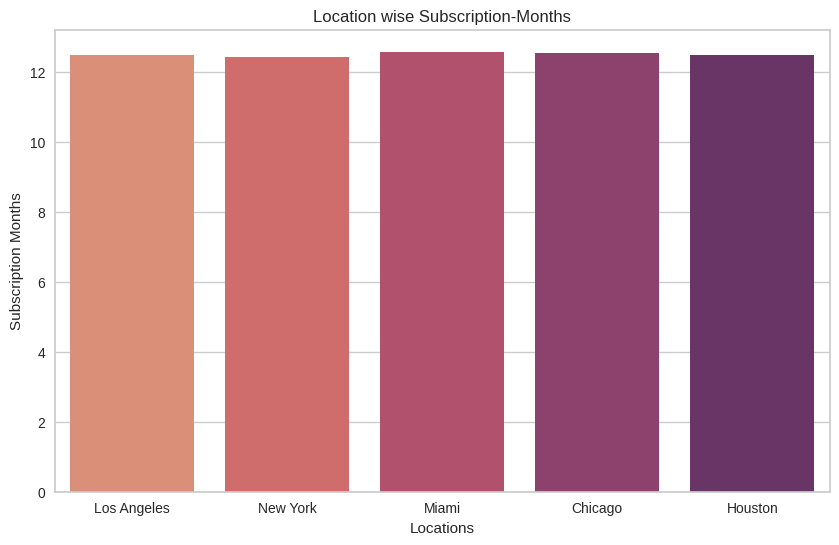

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Location'], y=df['Subscription_Length_Months'], ci=None, palette="flare")
plt.title("Location wise Subscription-Months")
plt.xlabel("Locations")
plt.ylabel("Subscription Months")

Text(0.5, 1.0, 'Gender Distribution')

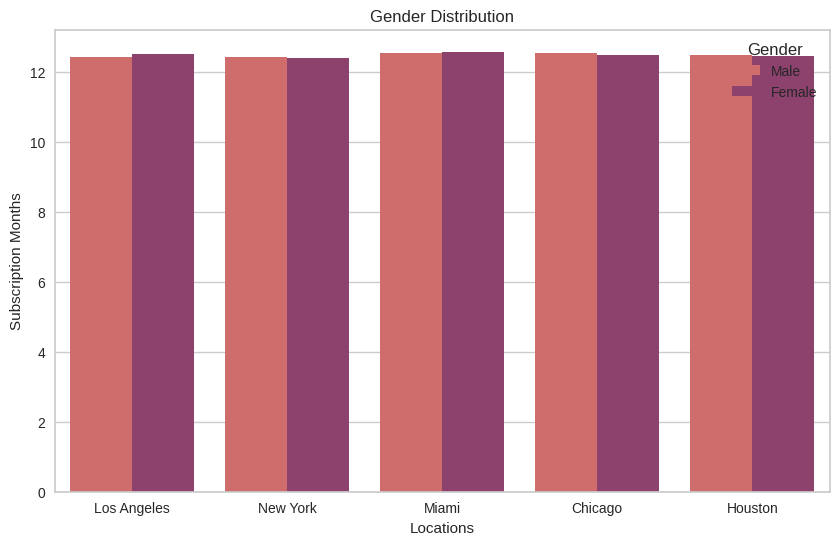

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Location'], y=df['Subscription_Length_Months'],hue=df['Gender'], ci=None, palette="flare")
plt.title("Location wise Subscription-Months")
plt.xlabel("Locations")
plt.ylabel("Subscription Months")
plt.title('Gender Distribution')

Text(0, 0.5, 'Monthly Bills')

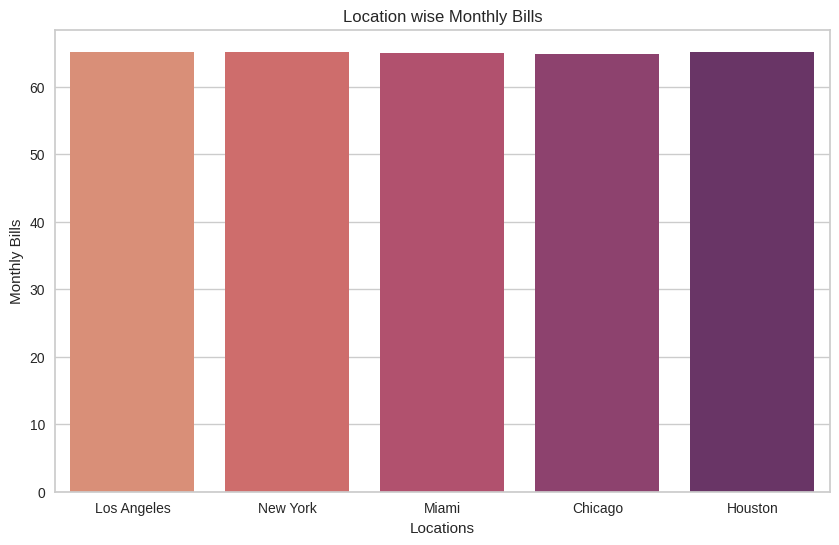

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Location'], y=df['Monthly_Bill'], ci=None, palette="flare")
plt.title("Location wise Monthly Bills")
plt.xlabel("Locations")
plt.ylabel("Monthly Bills")

Text(0.5, 1.0, 'Gender Distribution')

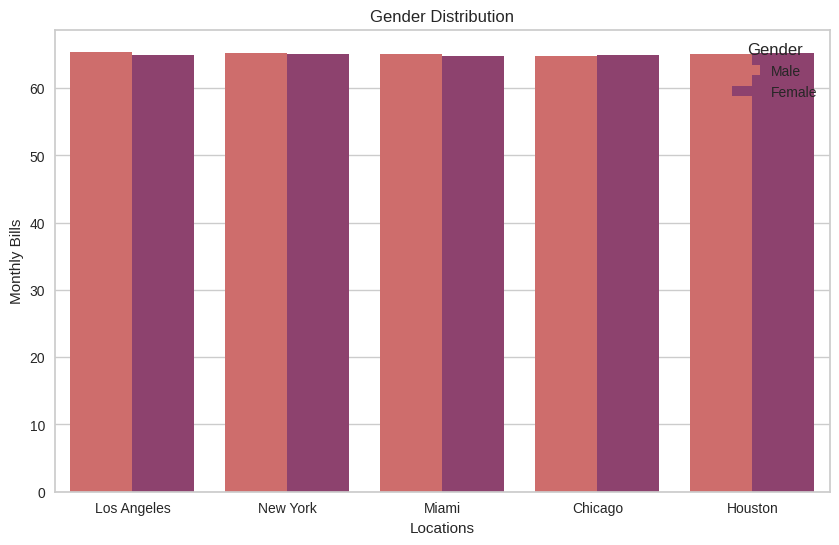

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Location'], y=df['Monthly_Bill'],hue=df['Gender'], ci=None, palette="flare")
plt.title("Location wise Monthly Bills")
plt.xlabel("Locations")
plt.ylabel("Monthly Bills")
plt.title('Gender Distribution')

Text(0, 0.5, 'Total Usage(GB)')

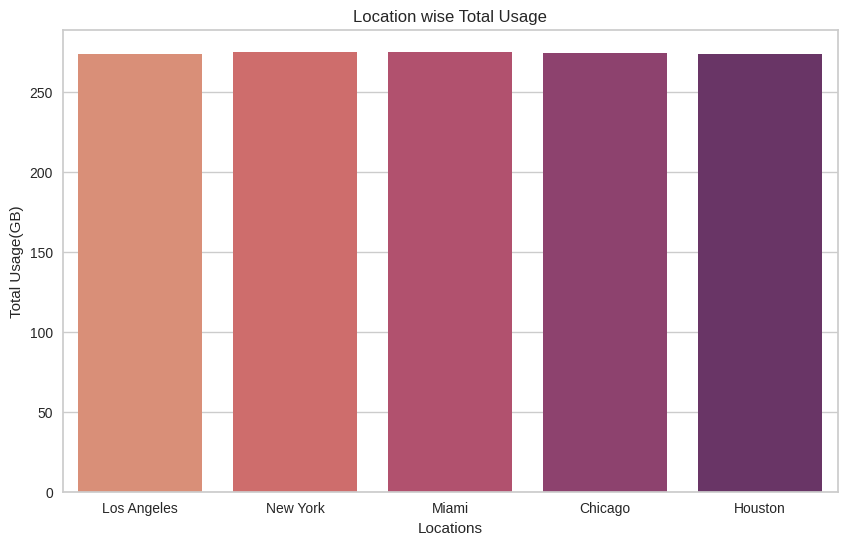

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Location'], y=df['Total_Usage_GB'], ci=None, palette="flare")
plt.title("Location wise Total Usage")
plt.xlabel("Locations")
plt.ylabel("Total Usage(GB)")

Text(0.5, 1.0, 'Gender Distribution')

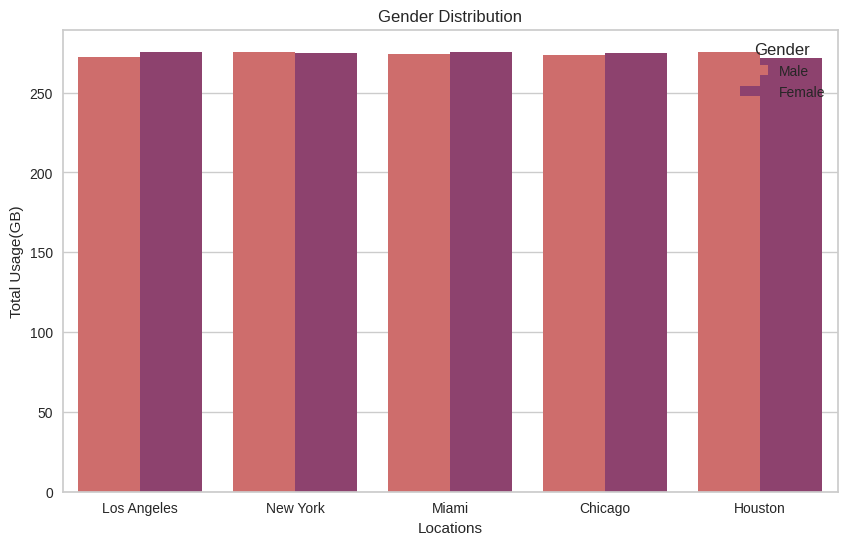

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Location'], y=df['Total_Usage_GB'],hue=df['Gender'], ci=None, palette="flare")
plt.title("Location wise Total Usage")
plt.xlabel("Locations")
plt.ylabel("Total Usage(GB)")
plt.title('Gender Distribution')

### AUTOVIZ Visualizations to display more relations

In [28]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(filename='',dfte=df,depVar='passthrough__Churn',verbose=1,max_rows_analyzed=df.shape[0])

Imported v0.1.730. After importing autoviz, execute '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (100000, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    9 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['CustomerID', 'Name']
Since Number of Rows in data 100000 exceeds maximum, randomly sampling 100000 rows for EDA...
Could not find given target var in data set. Please check input
Not able

## Data Preprocessing

#### Data underwent essential processing for analysis. StandardScaler normalized numeric features, while OneHotEncoding transformed categorical variables. This preprocessing prepared the dataset for machine learning, enhancing model performance by ensuring uniform scales and suitable representations of features.

### Distribution of numerical and categorical columns

In [29]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]

In [30]:
print(f"Numerical Features Count {len(numerical_features)}: {numerical_features}")
print(f"Discrete features Count {len(discrete_features)}: {discrete_features}")
print(f"Continuous features Count {len(continuous_features)}: {continuous_features}")
print(f"Categorical features Count {len(categorical_features)}: {categorical_features}")
print(f"Binary Categorical features Count {len(binary_categorical_features)}: {binary_categorical_features}")

Numerical Features Count 6: ['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']
Discrete features Count 2: ['Subscription_Length_Months', 'Churn']
Continuous features Count 4: ['CustomerID', 'Age', 'Monthly_Bill', 'Total_Usage_GB']
Categorical features Count 3: ['Name', 'Gender', 'Location']
Binary Categorical features Count 1: ['Gender']


In [31]:
#Dividing the columns into different lists for processing
num_feats=['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', ]
cat_feats=['Gender','Location']
pass_through=['Churn', ]
drop_feats=['CustomerID','Name']

In [32]:
#Used Column Transformer to easly perform feature transformation in one go!
ct=make_column_transformer(
        (StandardScaler(),num_feats),
        (OneHotEncoder(),cat_feats),
        ('drop',drop_feats),
        ('passthrough',pass_through)
)

In [33]:
df.head(5) #Display of dataset before the transformation

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [34]:
df_t= ct.fit_transform(df) #Transformation of the dataset

In [35]:
transformed_feature_names = ct.get_feature_names_out()
transformed_feature_names #Display of different column names

array(['standardscaler__Subscription_Length_Months',
       'standardscaler__Monthly_Bill', 'standardscaler__Total_Usage_GB',
       'onehotencoder__Gender_Female', 'onehotencoder__Gender_Male',
       'onehotencoder__Location_Chicago',
       'onehotencoder__Location_Houston',
       'onehotencoder__Location_Los Angeles',
       'onehotencoder__Location_Miami',
       'onehotencoder__Location_New York', 'passthrough__Churn'],
      dtype=object)

In [36]:
columns=ct.get_feature_names_out().tolist()
df_t=pd.DataFrame(df_t,columns=columns) #Converting the transformed data into datafram

In [37]:
df_t.head(5) #transformed dataset

,standardscaler__Subscription_Length_Months,standardscaler__Monthly_Bill,standardscaler__Total_Usage_GB,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__Location_Chicago,onehotencoder__Location_Houston,onehotencoder__Location_Los Angeles,onehotencoder__Location_Miami,onehotencoder__Location_New York,passthrough__Churn
0,0.651115,0.410606,-0.294289,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.658879,-0.805374,-0.784852,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.081380,1.009204,1.422681,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.370129,1.625597,0.173279,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.939864,-0.341720,-0.064338,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Model Building / Model Selection

#### Using PyCaret, diverse machine learning models were assessed on the dataset. Evaluation metrics like accuracy, recall, and F1-score guided model selection. The optimal algorithm was chosen based on its performance trade-offs, leading to an informed decision on the best model for churn prediction.

In [39]:
#Train-Test split using sklearn.model_selection
train_df, test_df = train_test_split(df_t, test_size=0.2, random_state=42)

## Model Comparision

In [40]:
models = setup(data=train_df, target='passthrough__Churn')
best_models = compare_models(sort='AUC')

,Description,Value
0,Session id,1974
1,Target,passthrough__Churn
2,Target type,Binary
3,Original data shape,"(80000, 11)"
4,Transformed data shape,"(80000, 11)"
5,Transformed train set shape,"(56000, 11)"
6,Transformed test set shape,"(24000, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5029,0.5024,0.5390,0.5010,0.5186,0.0061,0.0061,0.0390
dt,Decision Tree Classifier,0.5022,0.5022,0.4996,0.5005,0.5000,0.0045,0.0045,0.0810
lr,Logistic Regression,0.5012,0.5014,0.4520,0.4991,0.4738,0.0021,0.0021,0.3560
lda,Linear Discriminant Analysis,0.5012,0.5014,0.4519,0.4991,0.4737,0.0020,0.0020,0.0640
rf,Random Forest Classifier,0.5014,0.5005,0.4866,0.4996,0.4930,0.0027,0.0027,1.4990
dummy,Dummy Classifier,0.5018,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0390
et,Extra Trees Classifier,0.4986,0.4995,0.4878,0.4968,0.4922,-0.0029,-0.0029,1.5590
qda,Quadratic Discriminant Analysis,0.4996,0.4994,0.4459,0.3945,0.3939,-0.0012,-0.0025,0.0630
lightgbm,Light Gradient Boosting Machine,0.4988,0.4994,0.4435,0.4965,0.4683,-0.0029,-0.0029,156.3860
gbc,Gradient Boosting Classifier,0.4993,0.4989,0.4248,0.4971,0.4580,-0.0019,-0.0019,1.0040


In [43]:
best_models #Choosing the best model

GaussianNB(priors=None, var_smoothing=1e-09)

## FineTuning the model

#### Model fine-tuning refined the selected algorithm's performance. Hyperparameters were adjusted using techniques like grid search or random search. This process optimized the model's configuration, enhancing its predictive capabilities on the dataset and increasing overall accuracy in churn prediction.

In [44]:
model_tuned = tune_model(best_models)
model_final = finalize_model(model_tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5098,0.5025,0.5473,0.5075,0.5266,0.0199,0.0200
1,0.4948,0.4934,0.4498,0.4923,0.4701,-0.0107,-0.0107
2,0.5080,0.5139,0.5233,0.5061,0.5145,0.0162,0.0162
3,0.5057,0.4990,0.5251,0.5038,0.5142,0.0116,0.0116
4,0.5088,0.5125,0.5444,0.5065,0.5248,0.0177,0.0178
5,0.5030,0.4987,0.5183,0.5012,0.5096,0.0062,0.0062
6,0.4996,0.5037,0.5986,0.4982,0.5438,-0.0000,-0.0000
7,0.4998,0.4976,0.5025,0.4980,0.5003,-0.0003,-0.0003
8,0.5020,0.5021,0.5738,0.5002,0.5345,0.0044,0.0045


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Model Evalutaions

In [45]:
predictions = predict_model(model_final, test_df)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5048,0.5057,0.3957,0.5010,0.4422,0.0078,0.0080


,standardscaler__Subscription_Length_Months,standardscaler__Monthly_Bill,standardscaler__Total_Usage_GB,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__Location_Chicago,onehotencoder__Location_Houston,onehotencoder__Location_Los Angeles,onehotencoder__Location_Miami,onehotencoder__Location_New York,passthrough__Churn,prediction_label,prediction_score
75721,-0.215133,1.157989,1.667962,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.5219
80184,0.073617,-1.208229,1.139074,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.5179
19864,-1.081380,-1.583898,0.012313,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.5101
76699,-1.225755,1.463467,0.495210,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0.5176
92991,1.661737,0.848062,0.226934,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.5129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32595,1.084239,0.723993,-1.198764,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.5141
29313,-0.070758,1.566776,0.679172,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.5074
37862,0.073617,-1.271500,-1.053128,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0.5157
53421,0.073617,1.487193,1.713952,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.5110


## Model Save

In [50]:
y=df_t['passthrough__Churn']
X=df_t.drop('passthrough__Churn', axis=1)
trainX,testX,trainY,testY=train_test_split(X,y,test_size=0.1,random_state=42)
model=RandomForestClassifier()
model.fit(trainX,trainY)
pickle_out=open('clf.pkl','wb')
pickle.dump(model,pickle_out)
pickle_out.close()